In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load dữ liệu từ file CSV (ví dụ)
df = pd.read_csv('C:\\Users\\Administrator\\Downloads\\BIDV.csv')
df1=df.reset_index()['Price']
df1.describe

<bound method NDFrame.describe of 0       11054.8
1       10574.2
2        9973.4
3       10213.7
4       10153.6
         ...   
2467    41000.0
2468    41200.0
2469    41300.0
2470    41800.0
2471    42050.0
Name: Price, Length: 2472, dtype: float64>

In [3]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_train.shape[1])
X_train, y_train

(array([[0.07418187, 0.06248662, 0.04786633, ..., 0.04786633, 0.04786633,
         0.05078893],
        [0.06248662, 0.04786633, 0.05371396, ..., 0.04786633, 0.05078893,
         0.05956159],
        [0.04786633, 0.05371396, 0.05225145, ..., 0.05078893, 0.05956159,
         0.06394913],
        ...,
        [0.56839021, 0.56365468, 0.57028345, ..., 0.66687027, 0.68770319,
         0.70380059],
        [0.56365468, 0.57028345, 0.58543423, ..., 0.68770319, 0.70380059,
         0.72084461],
        [0.57028345, 0.58543423, 0.58354099, ..., 0.70380059, 0.72084461,
         0.71516489]]),
 array([0.05956159, 0.06394913, 0.0610241 , ..., 0.72084461, 0.71516489,
        0.72768266]))

In [8]:
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [9]:
# Dự báo
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test = scaler.inverse_transform([y_test])
test_predict

array([[34599.476],
       [34552.628],
       [33694.68 ],
       [33378.316],
       [34647.566],
       [34911.622],
       [34905.342],
       [34769.592],
       [33615.64 ],
       [33267.344],
       [33438.046],
       [32515.538],
       [32866.45 ],
       [34104.032],
       [34056.744],
       [33409.818],
       [32791.14 ],
       [34041.764],
       [35695.   ],
       [36197.534],
       [35951.194],
       [34923.424],
       [32936.548],
       [32955.226],
       [33001.744],
       [33031.312],
       [32972.972],
       [33156.15 ],
       [34463.15 ],
       [35728.64 ],
       [35961.126],
       [36033.502],
       [35839.714],
       [36087.756],
       [35660.516],
       [36161.802],
       [35264.238],
       [34984.23 ],
       [33644.584],
       [32876.792],
       [33715.848],
       [34052.164],
       [31656.446],
       [32767.188],
       [31241.778],
       [31291.436],
       [31699.282],
       [31983.694],
       [31983.956],
       [32734.896],


In [10]:
# Dự báo giá trị 30 ngày trong tương lai
last_30_days = df1[-30:]
next_30_days = []
for i in range(30):
    x = last_30_days[-time_step:].reshape(1, time_step)
    y_hat = model.predict(x)
    next_30_days.append(y_hat)
    last_30_days = np.append(last_30_days, y_hat)

next_30_days = np.array(next_30_days).reshape(-1, 1)
next_30_days = scaler.inverse_transform(next_30_days)

print(next_30_days)

[[41236.51 ]
 [39905.698]
 [39460.522]
 [39303.304]
 [39440.286]
 [39390.478]
 [39547.694]
 [39611.516]
 [39662.878]
 [39770.286]
 [39669.11 ]
 [39406.054]
 [39427.842]
 [39571.044]
 [39684.674]
 [39725.14 ]
 [39695.564]
 [39697.122]
 [39644.196]
 [39678.438]
 [39669.098]
 [39703.342]
 [39739.142]
 [39762.494]
 [39728.25 ]
 [39704.898]
 [39667.542]
 [39667.542]
 [39704.898]
 [39739.142]]


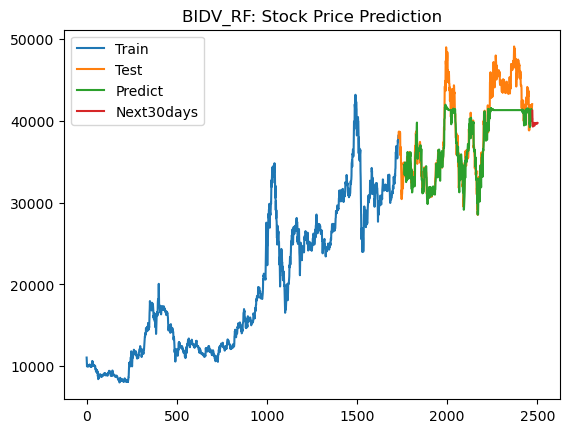

In [11]:
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
from matplotlib import pyplot as plt

# train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label="Train")
# plt.plot([*train_range], pred_train.squeeze(), label="Predict Train", linestyle="dotted", color = color_palette[1])

# test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
# test_range = range(len(y_true_train.squeeze()),len(y_true_train.squeeze()) + len(y_true_test.squeeze()))
plt.plot(test_data_index, scaler.inverse_transform(test_data), label="Test")
test_data_index = pd.RangeIndex(start=train_size+31, stop=len(df1), step=1)
plt.plot(test_data_index, test_predict.squeeze(), label="Predict", linestyle="-")

#30 days
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index, next_30_days.squeeze(), label="Next30days")

# # Dự đoán 30 điểm tiếp theo
plt.legend()
plt.title('BIDV_RF: Stock Price Prediction')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAE và MAPE trên tập test
test_score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
test_score_mape = mean_absolute_percentage_error(y_test[0], test_predict[:, 0]) * 100
test_score_mda = calculate_mda(y_test[0], test_predict[:, 0])
msle = mean_squared_log_error(y_test[0], test_predict[:, 0])

print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')
print('MSLE trên tập test là:', msle)

RMSE trên tập test là: 2502.732031149589
MAPE trên tập test là: 4.2353370228595715 %
MDA trên tập test là: 39.29577464788732 %
MSLE trên tập test là: 0.0034459969431837128
